# Maxwell equations at planar interface

The Maxwell equations read

\begin{equation}
\begin{split}
\nabla \times \mathbf{E} &= -\frac{\partial \mathbf{B}}{\partial t} \\
\nabla \times \mathbf{H} &= \frac{\partial \mathbf{D}}{\partial t} + \mathbf{J}_{free} \\
\nabla \cdot \mathbf{D} &= \rho_{free} \\
\nabla \cdot \mathbf{B} &= 0
\end{split}
\end{equation}

The constitutive relations between the fields $B \leftrightarrow H$ and $E \leftrightarrow D$ are **defined** as

\begin{equation}
\mathbf{D} = \epsilon_0 (\epsilon \mathbf{E}) \quad \mathbf{B} = \mu_0 (\mu \mathbf{H})
\end{equation}

where $\epsilon_0$ and $\mu_0$ are the vacuum permeability and susceptibility. The parenthesis notation indicates that $\epsilon$ and $\mu$ are very general functions of space, time and the fields. For example:

\begin{equation}
(\epsilon \mathbf{E}) = \int \overleftrightarrow{\epsilon}(\mathbf{r}, \mathbf{r}', t, t', \mathbf{E}) d\mathbf{r}' dt'
\end{equation}

where the double headed arrow on top of $\epsilon$ indicates a tensor, which depends on space and time.
We will assume the following approximations:
* **linearity**: $\epsilon$ is not a function of the field $\overleftrightarrow{\epsilon}(\mathbf{E}) = \overleftrightarrow{\epsilon} \mathbf{E}$,
* **isotropy**: $\epsilon$ is a scalar and not a tensor $\overleftrightarrow{\epsilon}(\mathbf{r}, \mathbf{r}', t, t') = \epsilon(\mathbf{r}, \mathbf{r}', t, t')$,
* **time invariance**: the response of the system does not depend on its history $\epsilon(t, t') = \epsilon(t - t')$,
* **homogeneity** (aka space invariance): $\epsilon(\mathbf{r}, \mathbf{r}') = \epsilon(\mathbf{r} - \mathbf{r}')$,
* **non-dispersive**: the response does not depend on retardation effects $\epsilon(t - t') = \epsilon_r \delta(t - t')$,
* **locality**: the response only depends on the local position $\epsilon(\mathbf{r} - \mathbf{r}') = \epsilon_r \delta(\mathbf{r} - \mathbf{r}')$,

where $\epsilon_r$ is the relative dielectric permittivity. Same applies to $\mu$.

These assumptions translate to

\begin{equation}
\mathbf{D} = \epsilon_0 \epsilon_r \mathbf{E} \quad \mathbf{B} = \mu_0 \mu_r \mathbf{H}
\end{equation}

and are valid for linear, non-dispersive, homogeneous, isotropic materials.

We now expand the curl of the first two Maxwell equations

\begin{equation}
\begin{split}
\partial_y E_z - \partial_z E_y &= - \mu_0 \mu_r \; \partial_t H_x \\
\partial_z E_x - \partial_x E_z &= - \mu_0 \mu_r \; \partial_t H_y \\
\partial_x E_y - \partial_y E_x &= - \mu_0 \mu_r \; \partial_t H_z \\
\\
\partial_y H_z - \partial_z H_y &= + \epsilon_0 \epsilon_r \; \partial_t E_x  + J_x\\
\partial_z H_x - \partial_x H_z &= + \epsilon_0 \epsilon_r \; \partial_t E_y  + J_y\\
\partial_x H_y - \partial_y H_x &= + \epsilon_0 \epsilon_r \; \partial_t E_z  + J_z\\
\end{split}
\end{equation}

This is a system of coupled partial differential equations. In general, this is a very difficult problem to solve. We must adopt some simplifications: we will look for solutions with a very specific geometry. Specifically, we require the E and H field to depend only on the z space coordinate

\begin{equation}
\mathbf{E}(x,y,z) = \mathbf{E}(z) \quad \mathbf{H}(x,y,z) = \mathbf{H}(z)
\end{equation}

This assumption corresponds to waves propagating in the z direction with planar symmetry (see Fig. 1).
<img src="plane_wave.png" alt="Drawing" style="width: 400px;"/>
<center>Fig. 1: Plane waves propagating in the z direction.</center>
<br\><br\>

This condition implies that the partial derivatives along the x and y coordinates vanishes: $\partial_x = \partial_y = 0$. The Maxwell equations become

\begin{equation}
\boxed{
\begin{split}
\partial_z E_y &= + \mu_0 \mu_r \; \partial_t H_x \\
\partial_z H_x &= + \epsilon_0 \epsilon_r \; \partial_t E_y  + J_y
\end{split}}
\quad
\boxed{
\begin{split}
\partial_z E_x &= - \mu_0 \mu_r \; \partial_t H_y \\
- \partial_z H_y &= + \epsilon_0 \epsilon_r \; \partial_t E_x  + J_x
\end{split}}
\tag{1}
\end{equation}

<img src="ExH_fields.png" alt="Drawing" style="width: 400px;"/>

These are two indenpendent solutions, rotated by $\pi/2$, corresponding to the $\hat{x}$ and $\hat{y}$ polarisation components of the electromagnetic field. It sufficies to solve only one of them: we chose the first.

## Leapfrog algorithm and Yee scheme

We perform the following change in variables

\begin{equation}
\tilde{H} = Z_0 H, \quad \text{with} \quad Z_0 = \sqrt{\frac{\mu_0}{\epsilon_0}} = \mu_0 c = \frac{1}{\epsilon_0 c}
\end{equation}

where $Z_0 \sim 377 \Omega$ is the impedance of vacuum.
In this unit system $E$ and $\tilde{H}$ have the same unit of measures.

We can now rewrite the equations. NOTE: to make the notation less heavy, we can drop the x and y subscripts of the fields as well as the ~ sign on top of the H field.

\begin{equation}
\begin{split}
\partial_z E &= + \frac{\mu_r}{c} \; \partial_t H \\
\partial_z H &= + \frac{\epsilon_r}{c} \; \partial_t E  + \frac{J}{Z_0}
\end{split}
\end{equation}

To solve the above equation numerically, we discretise space and time. The partial derivatives become

\begin{equation}
\frac{\partial}{\partial z} E(z,t) \sim \frac{E(z+\Delta z,t) - E(z,t)}{\Delta z} \quad
\frac{\partial}{\partial t} E(z,t) \sim \frac{E(z,t+\Delta t) - E(z,t)}{\Delta t}
\end{equation}

where $\Delta z$ and $\Delta t$ are the chosen space and time intervals. The same applies to H.
The discretised equations become

\begin{equation}
\begin{split}
\frac{E_{z+\Delta z}^t - E_z^t}{\Delta z} &= + \frac{\mu_r}{c} \; \frac{H_{z}^{t+\Delta t} - H_z^t}{\Delta t} \\
\frac{H_{z+\Delta z}^t - H_z^t}{\Delta z} &= + \frac{\epsilon_r}{c} \; \frac{E_{z}^{t+\Delta t} - E_z^t} {\Delta t} + \frac{J_z^t}{Z_0}
\end{split}
\end{equation}

where we introduced the notation $E(z,t) = E_z^t$, $H(z,t) = H_z^t$, $J(z,t) = J_z^t$. We can now rearrange the terms and obtain

\begin{equation}
\boxed{
\begin{split}
E_{z}^{t+\Delta t} &= E_{z}^{t} + \frac{C}{\epsilon_r} \left( H_{z+\Delta z}^t - H_z^t \right) + \tilde{J_z^t} \\
H_{z}^{t+\Delta t} &= H_{z}^{t} + \frac{C}{\mu_r} \left( E_{z+\Delta z}^t - E_z^t \right)
\end{split}}
\tag{2}
\end{equation}

The above equations state that the fields at a future time step $t+\Delta t$ depends on the fields at the current time and at different positions. 

The quantities $C$ and $\tilde{J}$ are the convergence parameter and the source term, respectively. They are defined via

\begin{equation}
C=\frac{\Delta t}{\Delta z}c, \quad \tilde{J_z^t} = - \frac{\Delta t c}{\epsilon_0 Z_0} J_z^t = - \Delta t c^2 J_z^t
\end{equation}

The $C$ parameter is an adimensional quantity, it is the ratio between the speed of light $c$ and the "speed of sampling" $\Delta z / \Delta t$. This parameter determines the precision of our sampling scheme:
* too big values of $C$ correspond to an insufficient number of samples, which will lead to a loss of information on the higher frequency components,
* too small values of $C$ lead to oversampling, with the consequence of slowing down the calculation.

**How do we choose $\Delta z$ and $\Delta t$?**

We observe that the minimum amount of time taken for a wave to travel a distance $\Delta z$ is

\begin{equation}
T_{min} = \frac{\Delta z}{c}
\end{equation}

We want the time step to be smaller then the minimum period: $\Delta t < T_{min}$. Because of the Nyquist theorem, we must choose a time step which is **at least half** of the minimum period:

\begin{equation}
\Delta t \le \frac{\Delta z}{2c}
\end{equation}

Substituting into the $C$ expression we obtain $C \le 1/2$. However, because we also want to avoid oversampling, for the rest of the tutorial we will use $C=1/2$. This correspond to say that the wave will travel (at most) one space step every 2 time steps.

So, what values do we choose for $\Delta z$ and $\Delta t$? The answer is, it depends on the value of the smaller wavelength. Similarly to the time sampling, we want the space sampling to be **at least half** of the minimum wavelength

\begin{equation}
\Delta z \le \frac{\lambda_{min}}{2}
\end{equation}

Depending on the physical parameters of the system we have

\begin{equation}
\lambda_{min} = \frac{v_{max}}{\nu_{max}} = \frac{c}{\nu_{max} n_{max}}
\end{equation}

where $v_{max}$ is the maximum speed of the wave in a medium and $n_{max} = \sqrt{\epsilon_r \mu_r}$ is the maximum refractive index.

Once $\Delta z$ is chosen, then $\Delta t = \Delta z/2c$ (remember $C=1/2$ is fixed).
For plotting purposes, we may want to choose $\Delta z$, say, 1/10 of $\lambda_{min}$.

## Space and time grid

Equation 2 has a discrete form, but still we need to translate it into an algorithm. Specifically, we need to decide where (in space) to evaluate the fields in order to obtain the next value (in time). We are going to use the so-called **Yee scheme** (Fig. 2). Space and time are discretised into a grid. Also, the $E$ and $H$ field space grid are rigidly shifted by half step.

<img src="discretisation1.png" alt="Drawing" style=""/>
<center>Fig. 2: Space and time grid.</center>
<br\><br\>

Following the scheme in Fig. 2 we can finally write the integration model

\begin{equation}
\boxed{
\begin{split}
E_{k}^{i+1} &= E_{k}^{i} + \frac{C}{\epsilon_r} \left( H_{k+1}^i - H_k^i \right) + \tilde{J_k^i} \\
H_{k}^{i+1} &= H_{k}^{i} + \frac{C}{\mu_r} \left( E_{k}^i - E_{k-1}^i \right)
\end{split}}
\tag{3}
\end{equation}

We used the index $i$ for time and the index $k$ for space. Also, note that we shifted $E$ to the right of $H$. This means that the increments in the k-index is different when one updates $E$ or $H$.
This is evident by looking at the top right corner of Fig. 2: the new value of $E$ depends on $k$ and $k+1$ while the new value of $H$ depends on $k-1$ and $k$.

**What happens at the edges?**

When the updating scheme reaches the borders of the space grid, we need values of the fields that are not defined. This is clear by looking at Fig. 3.

<img src="discretisation2.png" alt="Drawing" style=""/>
<center>Fig. 3: At the boundaries we need to choose how to compute E and H.</center>
<br\><br\>

We have several options.

**1. Zero fields boundary conditions**

The easiest solution is setting the extra field layers to zero. The options depends on the right or left choice of the shift scheme. They are shown in Fig. 4:
1. we set only the extra E layer to zero,
2. we set only the extra H layer to zero,
3. we set both the extra field layers to zero,
4. we set the first and last elements to zero.

<img src="discretisation4.png" alt="Drawing" style=""/>
<center>Fig. 4: All the 4 possible choices for the zero fields boundary conditions.</center>
<br\><br\>

The difference is the change of polarity of the waves when they meet the boundary. 
Specifically:
1. when E=0 outside, E changes polarity but H doesn't (these are the **metallic boundary conditions**)
2. when H=0 outside, the situation is reversed.
3. and 4. both E and H reverse their polarity at the edges of the system (in an alternating fashion).

**2. Periodic boundary conditions**

Another common solution are the well-known periodic boundary conditions. The fields at the boundaries are replaced by their values at the opposite edge of the system. This condition reads

\begin{equation}
\begin{split}
E_{N}^{i+1} &= E_{N}^{i} + \frac{C}{\epsilon_r} \left( H_0^i - H_N^i \right) + \tilde{J_N^i} \\
H_{0}^{i+1} &= H_{0}^{i} + \frac{C}{\mu_r} \left( E_{0}^i - E_{N}^i \right)
\end{split}
\end{equation}

This has the consequence that a wave propagating through on of the edges will reappear at the opposite side.

**3. Open boundary conditions**

The previous two boundary conditions introduce some fictitious behaviour in the system. Namely:
* metallic boundaries enclose the system between two perfect mirrors,
* periodic boundaries represent a infinitely periodic repeating system.

What if we want to let waves propagate out of the scheme, without reflections or periodicity? To achieve this we look at Fig. 5.

<img src="discretisation3.png" alt="Drawing" style=""/>
<center>Fig. 5: Wave propagating to the right. When C=1/2 the wave moves one space step every two time steps.</center>
<br\><br\>

In Fig. 5 we show a wave propagating to the right. By definition, choosing a convergence parameter $C=1/2$ means that every 2 time steps the wave travles by one space step. Hence, we choose the missing boundary field to have the same value of the edge two stime steps ahead. In this way, the wave will continue to propagate seamlessly outside of the system. This condition reads

\begin{equation}
\begin{split}
E_{N}^{i+1} &= E_{N}^{i} + \frac{C}{\epsilon_r} \left( H_N^{i-2} - H_N^i \right) + \tilde{J_N^i} \\
H_{0}^{i+1} &= H_{0}^{i} + \frac{C}{\mu_r} \left( E_{0}^i - E_{0}^{i-2} \right)
\end{split}
\end{equation}

It is important to note that these open boundary conditions only works for:
* waves propagating outwards
* waves propagating in the same medium
* waves moving one space step every two time steps

Now it's time to implement it. But before this, a brief recap on how to create animations in jupyter.

## Jupyter animations

Let's create a simple animation of a propagating sinusoidal wave.

In [1]:
# import the usual numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# then import the methods animation and rc
from matplotlib import animation, rc
rc('animation', html='jshtml')     # for html5 video set html='html5'

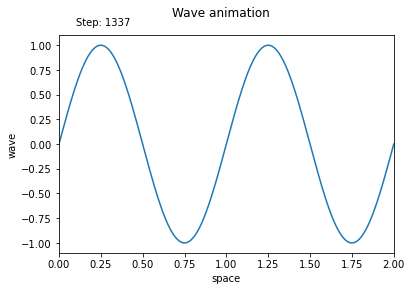

In [2]:
# define a figure and an axes
fig, ax = plt.subplots()

# specify the layout
fig.suptitle('Wave animation')
ax.set_xlim((0, 2))
ax.set_ylim((-1.1, 1.1))
ax.set_ylabel('wave')
ax.set_xlabel('space')
txt = ax.text(0.1,1.2, "Step: 1337")

# initialise the content of the axes
x = np.linspace(0, 2, 1000)
y = np.sin(2*np.pi*x)
line, = ax.plot(x, y)

# NOTE: fig, ax, line, txt, x, y are ALL global variables!

In [3]:
# define the animation function
# the function takes an integer input <step>
# <step> in incremented by one at every frame up to <frames>

def animate(step):
    newy = np.sin(2*np.pi*(x - 0.01*step))   # compute the new values of the wave
    txt.set_text("Step: {}".format(step))    # update the text object with the current step count
    line.set_data(x, newy)                   # update the line object with the new wave
    return line,

In [4]:
# FuncAnimation
movie = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)

In [5]:
# Let's play the movie
# this will take some time depending on the calculation and on how many frames

movie

In [ ]:
# Save it if you want
movie.save('sine_animation.mp4', writer='imagemagick')

This is the most basic way to create animations in python:
* first we defined an empty figure and axes
* then the layout
* we defined some initial condition (the first frame)
* finally we defined the animation function.

The animation function operates over the global variables, and updates them at every step, depending on our implementation. Now let's move on and implement the Maxwell equation sover.

# Exercise 1

Let's start from a simple case:
* no source term: $J=0$.
* the material is vacuum: $\epsilon_r = \mu_r = 1$.
* implement metallic and periodic boundary conditions.

Coding hints:
* define E and H fields as numpy array of some length N
* also, define the space grid as `np.arange(N)`, no need to think about $\Delta z$ yet
* properly use the slicing shortcuts of numpy, i.e. `E[1:]` and `E[:-1]` to evaluate the fields at $k+1$ and $k-1$
* remember to set some initial values for the E or H fields (a spike, a gaussian, a wave packet, whatever...)

<div class="alert alert-success">
<b>TRY IT YOURSELF!</b><br>
</div>

# Exercise 2

Let's now implement the open boundary conditions. We need to store the two previous values of the fields.
Specifically, we need the values of E at the first site `E[0]`, and the values of H at the last site `H[-1]`, for the 2 most recent time steps.

Coding hints:
* define some auxiliary variables, e.g. `E1`, `E2`, `H1`, `H2`, and update them after every iteration
* also, pay attention that python needs to know that `animate` takes those variable from the `global` scope

<div class="alert alert-success">
<b>TRY IT YOURSELF!</b><br>
</div>

# Exercise 3

Vacuum | Glass | Vacuum

Let's try to include a second material (e.g. glass $\epsilon_r \sim 5-10$, $\mu_r = 1$) and sandwich it between the vacuum.

Coding hints:
* define some global `epsilon` and `mu` as a ndarray of the same length `N` with different values depending on the position
* just plug `epsilon` and `mu` in the update algorithm

Try different initial conditions and observe the propagation:
* What do you see when the wave hits the interface?
* after several frames, does the shape of the wave remain the same?

<div class="alert alert-success">
<b>TRY IT YOURSELF!</b><br>
</div>

# Exercise 4

Now let's implement the proper values of $\Delta z$ and $\Delta t$. We want $\Delta z$ smaller than the minimum half wavelength and $\Delta t$ exactly two times wider then the minimum time period. I rewrite here the relations:

\begin{equation}
\Delta z \le \frac{\lambda_{min}}{2} = \frac{c}{2 \nu_{max} n_{max}} \quad \Delta t = \frac{\Delta z}{2c}
\end{equation}

* where $\nu_{max}$ is the maximum frequency, it depends on the initial conditions (the wave that we send in)
* while $n_{max} = \sqrt{\epsilon_r^{max} \mu_r^{max}}$ only depend on the materials

Coding hints:
* choose some characteristic unit of measure and define the speed of ligth. For example:
    - meters per second $c = 3 \cdot 10^8 m/s$, for radio wave physics
    - micrometers per picosencond $c =  3 \cdot 10^2 \mu m/ps$, for THz physics
    - Hartree bohr per hbar $c = 137 Ha \, a_0 / \hbar$, for atomic physics
* choose (or estimate) the maximum frequency of you incoming pulse. What is the maximum frequency of a gaussian?
* construct the space and time grids based on the physics you want to study. For example:
    - 2000 micron thick glass, 5 THz pulse, for 15 ps.

<div class="alert alert-success">
<b>TRY IT YOURSELF!</b><br>
</div>